In [1]:
import sys
sys.path.append('../src')
from models import SentimentModelTrainer
import pandas as pd

In [2]:
final_data = pd.read_csv('../data/processed/feature_dataset.csv')

In [3]:
trainer = SentimentModelTrainer()

In [4]:
trainer.preparing_data(final_data)

Preparing data for training...
Training set size: 17339
Test set size: 4335
Class distribution in training
sentiment_category
positive    13648
neutral      2727
negative      964
Name: count, dtype: int64


In [5]:
trainer.define_the_models()

Defined 4 baseline models


In [6]:
trainer.train_and_evaluate_models()


Training Logistic Regression
CV Accuracy: 0.842 (+/- 0.009)
AS Accuracy: 0.8410611303344867

Training Navie Bayes
CV Accuracy: 0.808 (+/- 0.008)
AS Accuracy: 0.8073817762399077

Training Random Forest
CV Accuracy: 0.836 (+/- 0.008)
AS Accuracy: 0.8320645905420992

Training SVM
CV Accuracy: 0.841 (+/- 0.008)
AS Accuracy: 0.8392156862745098


In [7]:
comparison_df = trainer.comparing_models()


MODEL COMPARISON RESULTS
              Model  CV_Mean   CV_STD  Test_Accuracy
Logistic Regression 0.842032 0.004668       0.841061
                SVM 0.840648 0.004215       0.839216
      Random Forest 0.836323 0.004078       0.832065
        Navie Bayes 0.808121 0.003880       0.807382



Analysis of the model: Logistic Regression


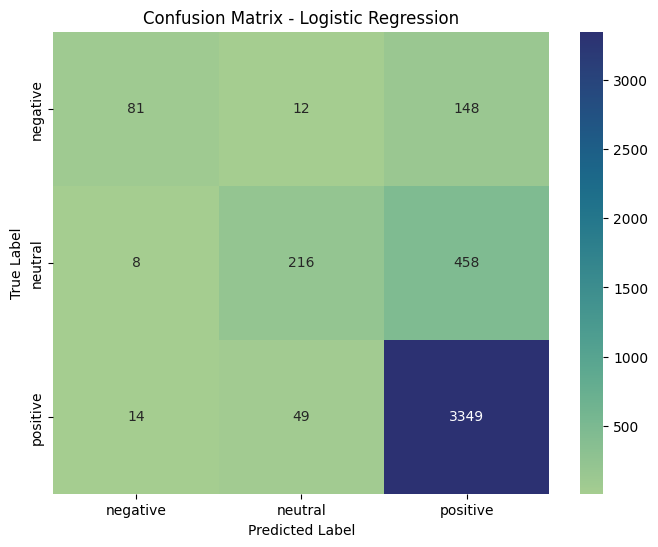

In [8]:
best_model, best_result = trainer.analyze_best_models()

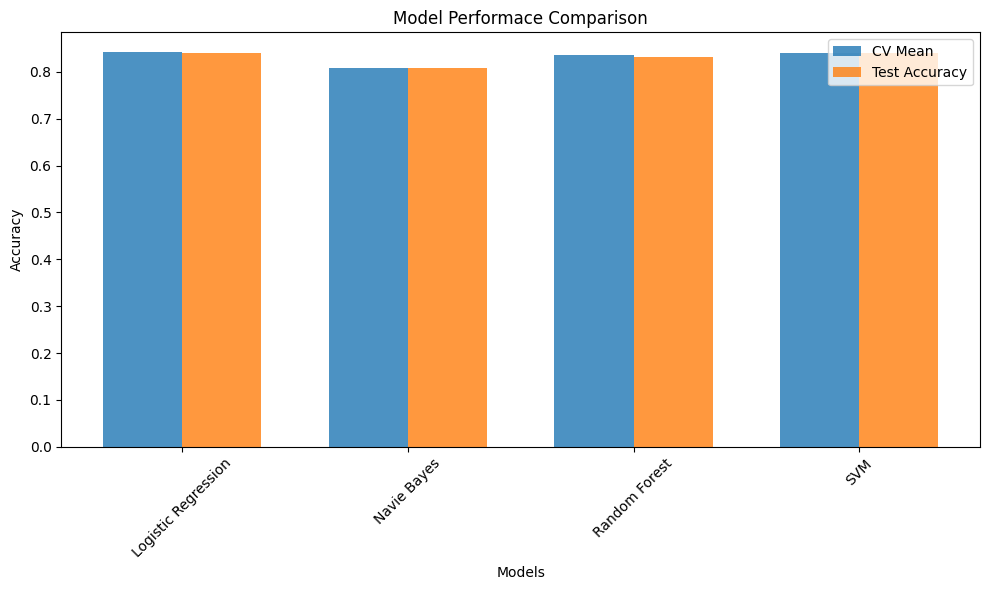

In [9]:
trainer.plot_model_comparison()

In [10]:
best_optimized_model, best_params, optimized_accuracy = trainer.optimize_best_model(best_model)

Optimizing Logistic Regression
Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as sho

Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'tfidf__max_features': 3000}
Optimized accuracy 0.844
Improvement: 0.003


In [11]:
trainer.analyze_features_importance(best_optimized_model, best_model)


Feature Importance Analysis for Logistic Regression
Top 20 Important Features:
heath: 3.3322
toffee: 3.2464
lime: 2.8306
dough: 2.7902
java: 2.3062
peach: 2.1121
blueberry: 2.1097
cannoli: 2.1046
bars: 2.0894
bar: 2.0620
costco: 2.0092
brownies: 2.0076
cookie: 1.9781
bourbon: 1.8898
core: 1.8530
truffles: 1.7071
brownie: 1.6974
carb: 1.6951
caramel: 1.6806
key: 1.6425


In [12]:
trainer.test_model_on_examples(best_optimized_model)


Testing model on example reviews:
Review: Super good, don't get me wrong. But I came for the caramel and brownies, not the sweet cream.The taste of this was amazing, but the ratio of brownie to sweet cream was disappointing.Liked it regardless but probably won't buy again simply because it didn't live up to its promising package.I'll find another one that has a better ratio and wayyy more yummy chewy brownies.Overall, good flavor, texture, idea, and brownies.Not so great caramel/sweet cream/ brownie RATIO.Just add more brownies. Please.
Prediction: neutral (confidence: 0.866)
------------------------------


In [13]:
comparison_df.to_csv('../results/model_comparison.csv', index=False)
print("\nResults saved to '../results/model_comparion.csv'")


Results saved to '../results/model_comparion.csv'


In [14]:
import joblib
joblib.dump(best_optimized_model, '../models/final_sentiment_model.pkl')
print("Final model saved")

Final model saved


In [ ]:
model_docs = {
    'model_type': best_model,
    'test_accuracy': optimized_accuracy,
    'best_parameters': best_params,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
    'features_used': 'TF-IDF (5000 features) + text statistics',    #is it possible to change this?
    'classes': ['negative', 'neutral', 'positive']
}

In [16]:
import json
with open('../models/model_documentation.json', 'w') as f:
    json.dump(model_docs, f, indent=2)